# TP 3.1 : Test de Student

Nous nous intéressons ici au test de Student de comparaison des moyennes sur 2 échantillons indépendants simulés selon des lois normales de même variance $\sigma^2 > 0$,
\begin{equation*}
X_1,\dots,X_p \sim \mathcal{N}(m_X,\sigma^2) \quad \text{et} \quad Y_1,\dots,Y_q \sim \mathcal{N}(m_Y,\sigma^2).
\end{equation*}
Pour expérimenter, nous prendrons $p=q=10$, $m_X=m_Y=0$ et $\sigma^2=1$.

In [2]:
# Génération des échantillons
x <- rnorm(10)
y <- rnorm(10)

Le test bilatéral de comparaison des moyennes sur ces 2 échantillons se fait en utilisant la fonction `t.test()` avec l'option `var.equal=TRUE`.

In [3]:
# Test bilatéral de comparaison des moyennes
resultat_test <- t.test(x, y, var.equal=TRUE)

# L'objet obtenu contient beaucoup d'informations
resultat_test


	Two Sample t-test

data:  x and y
t = 0.9539, df = 18, p-value = 0.3528
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4761823  1.2681948
sample estimates:
 mean of x  mean of y 
-0.1506241 -0.5466304 


<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Donner l'hypothèse nulle $H_0$ et l'hypothèse alternative $H_1$ de ce test.</li>
        <li>Pourquoi faut-il supposer que les deux échantillons aient la même variance ? En particulier, quelle est la loi de la variable
            \begin{equation*}
                (p+q-2)\frac{\tilde{\sigma}^2_{p,q}}{\sigma^2} \quad \text{où} \quad \tilde{\sigma}^2_{p,q} = \frac{1}{p+q-2}\sum_{k=1}^p\left( X_k - \bar{X}_p \right)^2 + \frac{1}{p+q-2}\sum_{k=1}^q\left( Y_k - \bar{Y}_q \right)^2\ ?
            \end{equation*}
        </li>
        <li>En déduire la loi de la statistique de test
            \begin{equation*}
                T = \sqrt{\frac{pq}{p+q}} \times \frac{\bar{X}_p - \bar{Y}_q}{\sqrt{\tilde{\sigma}^2_{p,q}}}.
            \end{equation*}
        </li>
        <li>Vérifier le calcul de la statistique de test donné dans <code>resultat_test</code>.</li>
        <li>Quelle est la p-valeur du test <code>resultat_test</code> ? Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ ? Est-ce cohérent avec notre simulation initiale ?</li>
        <li>Recalculer cette p-valeur à partir d'une loi de Student à 18 degrés de liberté.</li>
    </ol>
</div>

In [13]:
# À FAIRE
# Q1: H0 et H1
#     H0: mu_x = mu_y
#     H1: mu_x != mu_y
# Q2:cette variable suit la loi χ2(p + q −2)
# Q3: cette variable suit la loi t(p + q −2)( loi de Student de p + q −2 degrés de liberté)
# Q4:
p=length(x)
q=length(y)
sigma_pq=(sum((x-mean(x))^2)+sum((y-mean(y))^2))/(p+q-2)
t=sqrt(p*q/(p+q))*(mean(x)-mean(y))/sqrt(sigma_pq)
cat("T=",t,"\n")
cat("p_value=",resultat_test$p.value,"\n")
# Q5: On rejette H0 au seuil 5% 
#     si la p_value est inférieure à 0.05
#     ici p_value=0.35 > 0.05 donc on ne rejette
#     Ce qui est cohérent avec le fait que les échantillons
#     ont été générés selon la même loi.
# Q6:
# p_value du loin t de Student
p_value_st=2*(1-pt(abs(t),df=p+q-2))
cat("p_value de la loi t de Student=",p_value_st,"\n")



T= 0.9538973 
p_value= 0.3527713 
p_value de la loi t de Student= 0.3527713 


Pour illustrer la notion de niveau d'un test, nous simulons 1000 paires d'échantillons de taille 10 comme ci-dessus et nous les stockons dans deux matrices `X` et `Y`.

In [19]:
X <- matrix(rnorm(1000*10), nrow=1000)
Y <- matrix(rnorm(1000*10), nrow=1000)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer un test de comparaison des moyennes pour chaque paire d'échantillons et stocker la p-valeur du résultat dans un vecteur <code>p_valeur</code> de taille 1000.</li>
        <li>Combien de p-valeurs inférieures à 0.05 obtenez-vous ? Combien devriez-vous théoriquement en obtenir en moyenne ?</li>
        <li>Repérer l'indice du test qui donne la plus petite p-valeur (il peut être utile d'utiliser la fonction <code>which.min()</code>). Pour un niveau de 95%, doit-on accepter ou rejeter $H_0$ pour ce test ?</li>
        <li>Représenter graphiquement les données correspondant à ce test :
            <ul>
                <li>afficher la densité de la loi normale centrée réduite entre -3 et 3 avec <code>plot(dnorm, -3, 3, type="l")</code>,</li>
                <li>afficher les deux échantillons avec deux couleurs différentes grâce à la fonction <code>rug()</code>,</li>
                <li>afficher les moyennes des deux échantillons (fonction <code>rug()</code>),</li>
                <li>ajouter une légende.</li>
            </ul>
            <center><img src="img/student.png"></center>
        </li>
    </ol>
</div>

Nombre de p_values < 0.05: 55 
Indice de la plus petite p_value: 967 
Plus petite p_value: 0.001757389 


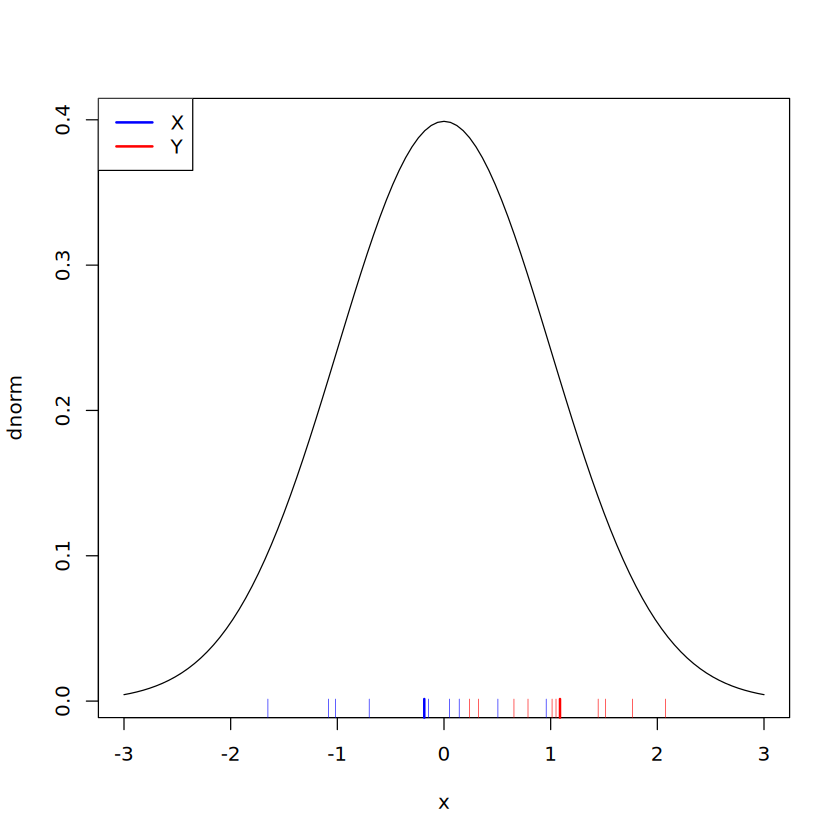

In [27]:
# À FAIRE
par(bg="white")
# Q1
p_values <- rep(0,1000)
for (i in 1:1000){
  test <- t.test(X[i,], Y[i,], var.equal=TRUE)
  p_values[i] <- test$p.value
}
# Q2
p_values_inf_05 <- sum(p_values < 0.05)
cat("Nombre de p_values < 0.05:", p_values_inf_05, "\n")
indice_min <- which.min(p_values)
cat("Indice de la plus petite p_value:", indice_min, "\n")
cat("Plus petite p_value:", p_values[indice_min], "\n")
# p_value min = 0.000137 < 0.05
# donc on rejette H0 pour cet indice
# Q3
plot(dnorm,-3,3,type = "l")
rug(X[indice_min,],col="blue")
rug(Y[indice_min,],col="red"  )
rug(mean(X[indice_min,]),col="blue",lwd=2)
rug(mean(Y[indice_min,]),col="red",lwd=2)
legend("topleft",legend=c("X","Y"),col=c("blue","red"),lwd=2)